In [6]:
# -*- coding: utf-8 -*-
"""
Created on Sat Jun  2 11:09:55 2018

@author: Marcelo
"""

from sys import platform
from scipy.signal import (find_peaks, peak_widths)
# from pathlib import Path, PurePath
import matplotlib.pyplot as plt
import numpy as np

In [7]:
def readiecsp( fn ):
    fi = open(fn, 'r')
    lins = fi.readlines()
    fi.close()
    
    inidat = 1
    for lin in lins:
        if lin.find(r'A004USERDEFINED') == 0:
            break
        inidat += 1
        
    lt = float( lins[1][ 4:18] )
    rt = float( lins[1][18:32] )   
        
    cnts = [0]
    itr = list(range( inidat, len(lins) ))
    for ilin in itr:
        cnts.append( int(lins[ilin][10:20]) )
        cnts.append( int(lins[ilin][20:30]) )
        cnts.append( int(lins[ilin][30:40]) )
        cnts.append( int(lins[ilin][40:50]) )
        cnts.append( int(lins[ilin][50:60]) )
    del itr
    del lins
    
    # x2 = range(len(cnts))
    return cnts, lt, rt

In [8]:
def bytes_from_file(filename, chunksize=8192):
    with open(filename, "rb") as f:
        while True:
            chunk = f.read(chunksize)
            if chunk:
                for b in chunk:
                    yield b
            else:
                break

In [9]:
def chunks_from_file(filename, chunksize=8192):
    with open(filename, "rb") as f:
        while True:
            chunk = f.read(chunksize)
            if chunk:
                yield chunk
            else:
                break

In [10]:
# example 2:
# fn = r'../ipen/Relat_Eflu-gasosos_2018/Filtros/2018/CTP/CTP0706.Chn'
# 2019-03-04:
fn = r'../gamma/spectra/Filtros/2017/CTP/CTP2906.Chn'
chunksize = 32
with open(fn, 'rb') as f:
    chunksize = 32
    chu1 = f.read(chunksize)
    lngtdt = np.frombuffer(chu1[30:32], dtype='u2')[0]
    chunksize = 4 * lngtdt
    chu2 = f.read(chunksize)
print(chu1)
rltime, lvtime = np.frombuffer(chu1[8:16], dtype='<u4')
print(rltime)
print(lvtime)
print(lngtdt)
counts = np.frombuffer(chu2, dtype='<u4')
print(counts)

# zz = np.dtype('uint32', yy)
# zz = int(yy)
# zz
              
# for b in bytes_from_file('../ipen/Relat_Eflu-gasosos_2018/Filtros/2018/CTP/CTP0706.Chn'):
#    # print(b)
#    a=1
#type(b)

b'\xff\xff\x03\x00\x01\x0010(\xf0\x03\x00\x90\xd0\x03\x0029Jun1710919\x00\x00\x00\x10'
258088
250000
4096
[0 0 0 ... 0 0 0]


In [11]:
len(counts)

4096

In [12]:
def writeiecsp( fnheader, fndestiny, cnts ):
    fhead = open(fnheader, 'r')
    lins = fi.readlines()
    fi.close()
    
    inidat = 1
    for lin in lins:
        if lin.find(r'A004USERDEFINED') == 0:
            break
        inidat += 1
        
    cnts = [0]
    itr = list(range( inidat, len(lins) ))
    for ilin in itr:
        cnts.append( int(lins[ilin][10:20]) )
        cnts.append( int(lins[ilin][20:30]) )
        cnts.append( int(lins[ilin][30:40]) )
        cnts.append( int(lins[ilin][40:50]) )
        cnts.append( int(lins[ilin][50:60]) )
    del itr
    del lins
    
    # x2 = range(len(cnts))
    return cnts

In [13]:
def sumspectra( fnh, fn1, fn2, fns ):
    # if platform == 'linux':
    #     fi = open(r'/home/' + fnh, 'r')
    # else:
    #     fi = open(r'/Users/' + fnh, 'r')
    fi = open(fnh, 'r')
  
    lins = fi.readlines()
    fi.close()

    header = []
    inidat = 1
    for lin in lins:
        inidat += 1
        header.append( lin )
        if lin.find(r'A004USERDEFINED') == 0:
            break

    cnts1, lt1, rt1 = readiecsp( fn1 )
    cnts2, lt2, rt2 = readiecsp( fn2 )
    
    ltstr = '{0:14.6f}'.format( lt1 + lt2 )
    rtstr = '{0:14.6f}'.format( rt1 + rt2 )      
    
    headerline1 = header[1][0:4] + ltstr + rtstr + header[1][32:]
        
    sums = []
    for i in range( len(cnts1) ):
        sums.append( cnts1[i] + cnts2[i] )

    formattedcounts = []
    nlin = len(cnts1) // 5
    i = 0
    for ilin in range( nlin ):
        lin = 'A004'
        lin += repr( ilin*5 ).rjust(6)
        for ifield in range(5):
            lin += repr( sums[i] ).rjust(10)
            # lin += '{0:10}'.format( sums[i] ) # works as well
            i += 1
        lin += '\n'
        formattedcounts.append( lin )

    # if platform == 'linux':
    #    fo = open(r'/home/' + fns, 'w')
    # else:
    #    fo = open(r'/Users/' + fns, 'w')
    fo = open(fns, 'w')
        
    fo.writelines( header[0] )
    fo.write( headerline1 )
    fo.writelines( header[2:] )
    fo.writelines( formattedcounts )    
    
    fo.close()

In [9]:
# A soma de espectros a seguir já foi feita e o arquivo já foi gerado. Não fazer de novo.

In [10]:
# sumspectra('C:/GENIE2K/CAMFILES/2018_UFSE/Amo1-A.IEC',
#          'C:/GENIE2K/CAMFILES/2018_UFSE/Amo1-A.IEC',
#          'C:/GENIE2K/CAMFILES/2018_UFSE/Amo1-B.IEC',
#          'C:/GENIE2K/CAMFILES/2018_UFSE/Amo1_UFS.IEC')

In [11]:
cts_amo1_A, lt_amo1_A, rt_amo1_A = readiecsp('C:/GENIE2K/CAMFILES/2018_UFSE/Amo1-A.IEC')

In [12]:
cts_amo1_B, lt_amo1_B, rt_amo1_B = readiecsp('C:/GENIE2K/CAMFILES/2018_UFSE/Amo1-B.IEC')

In [13]:
cts_amo2_A, lt_amo2_A, rt_amo2_A = readiecsp('C:/GENIE2K/CAMFILES/2018_UFSE/Amo2_UFS.IEC')

In [14]:
len_amo1_A = len(cts_amo1_A)
len_amo1_B = len(cts_amo1_B)
len_amo2_A = len(cts_amo2_A)

In [15]:
# Lembrar que em Python o índice base é 0 (não 1 como em R)

In [16]:
len_amo1_A

8196

In [17]:
len_counts = len(counts)
len_counts

4096

In [18]:
xamo1A = np.linspace(0,len_amo1_A-1,len_amo1_A)
xamo1B = np.linspace(0,len_amo1_B-1,len_amo1_B)
xamo2A = np.linspace(0,len_amo2_A-1,len_amo2_A)

In [19]:
x_filtrotp = np.linspace(0, len(counts)-1, len(counts))

In [20]:
xamo1A

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 8.193e+03, 8.194e+03,
       8.195e+03])

In [21]:
uiui1 = np.linspace(456,498,498-456+1)
uiui1

array([456., 457., 458., 459., 460., 461., 462., 463., 464., 465., 466.,
       467., 468., 469., 470., 471., 472., 473., 474., 475., 476., 477.,
       478., 479., 480., 481., 482., 483., 484., 485., 486., 487., 488.,
       489., 490., 491., 492., 493., 494., 495., 496., 497., 498.])

In [22]:
len(cts_amo1_A)

8196

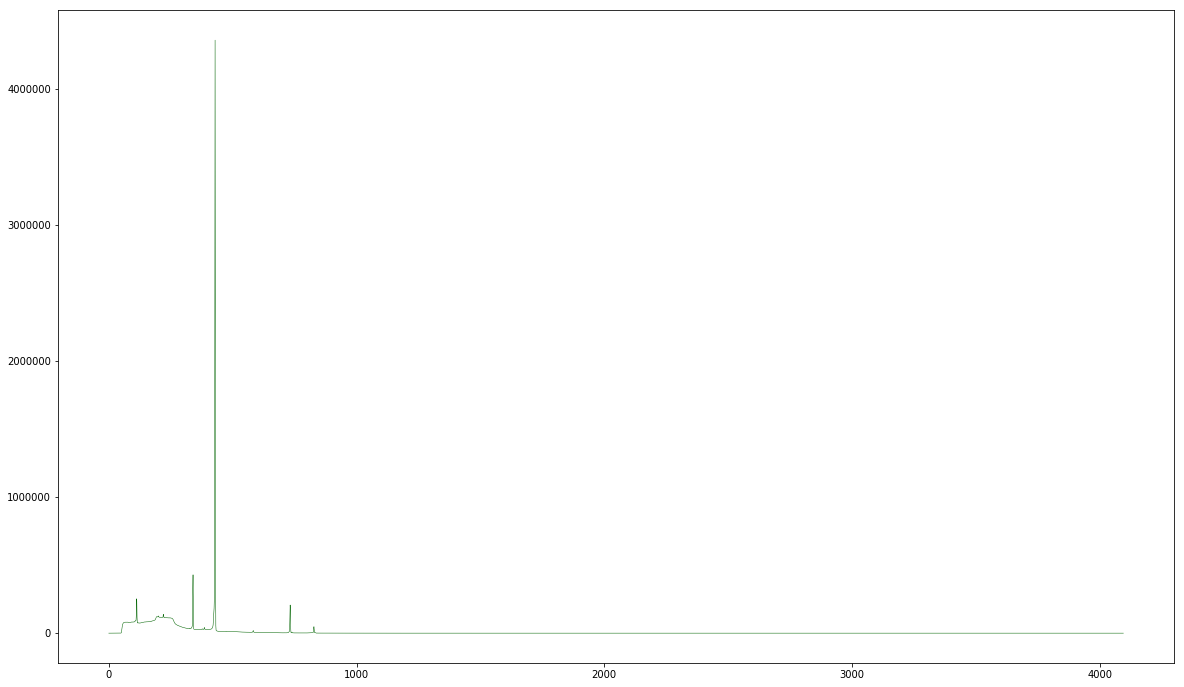

In [23]:
fig1, ax1 = plt.subplots(1, 1, figsize=(20,12))
# out1 = ax1.plot(xamo1A, cts_amo1_A, color='darkgreen', linewidth='0.5')
out1 = ax1.plot(x_filtrotp, counts, color='darkgreen', linewidth='0.5')

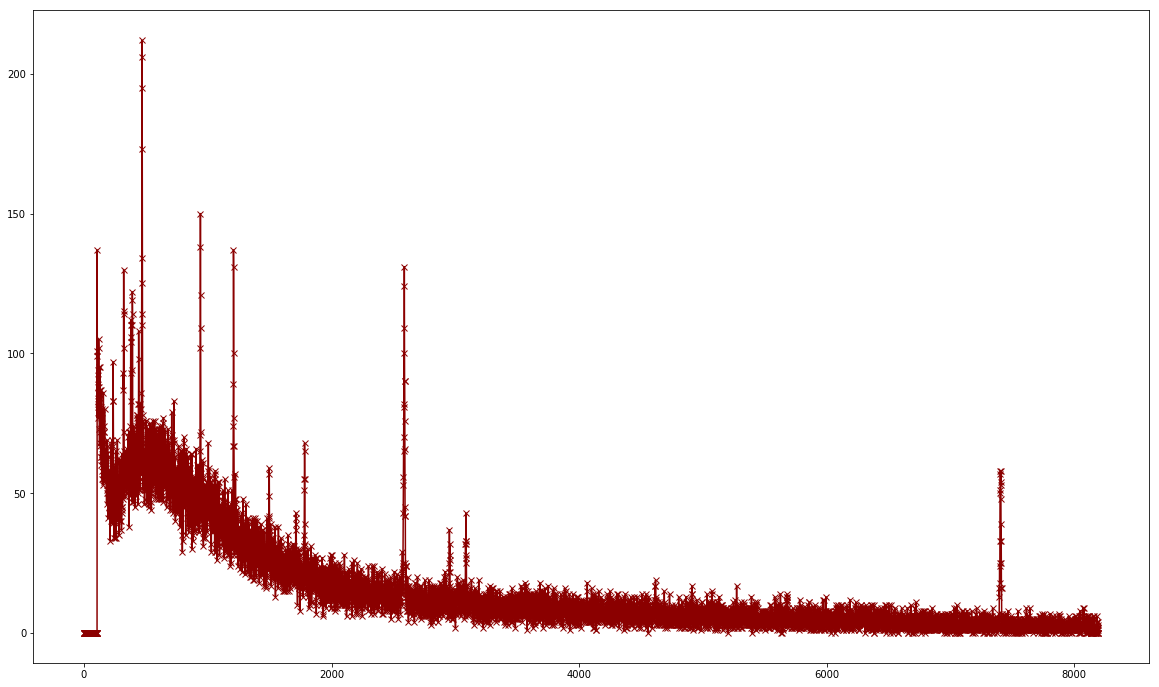

In [24]:
fig2, ax2 = plt.subplots(1, 1, figsize=(20,12))
out2 = ax2.plot(xamo1B, cts_amo1_B, marker='x', color='darkred')

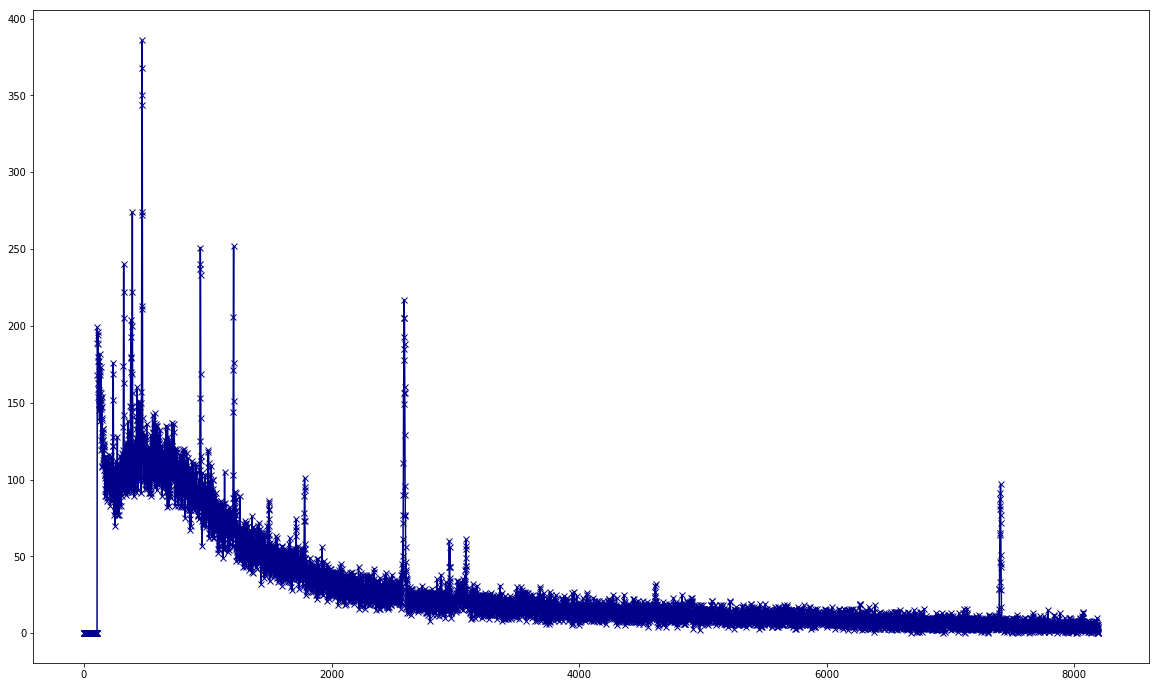

In [25]:
fig3, ax3 = plt.subplots(1, 1, figsize=(20,12))
out3 = ax3.plot(xamo2A, cts_amo2_A, marker='x', color='darkblue')

In [26]:
sum_amo1 = [x + y for x, y in zip(cts_amo1_A, cts_amo1_B)]

In [27]:
len(sum_amo1)

8196

In [28]:
a=[5,8,2]

In [29]:
b=[98,4,7]

In [30]:
c=[ai*bi for ai, bi in zip(a,b)]
c

[490, 32, 14]

In [31]:
d=[[ai,bi] for ai,bi in zip(a,b)]
d

[[5, 98], [8, 4], [2, 7]]

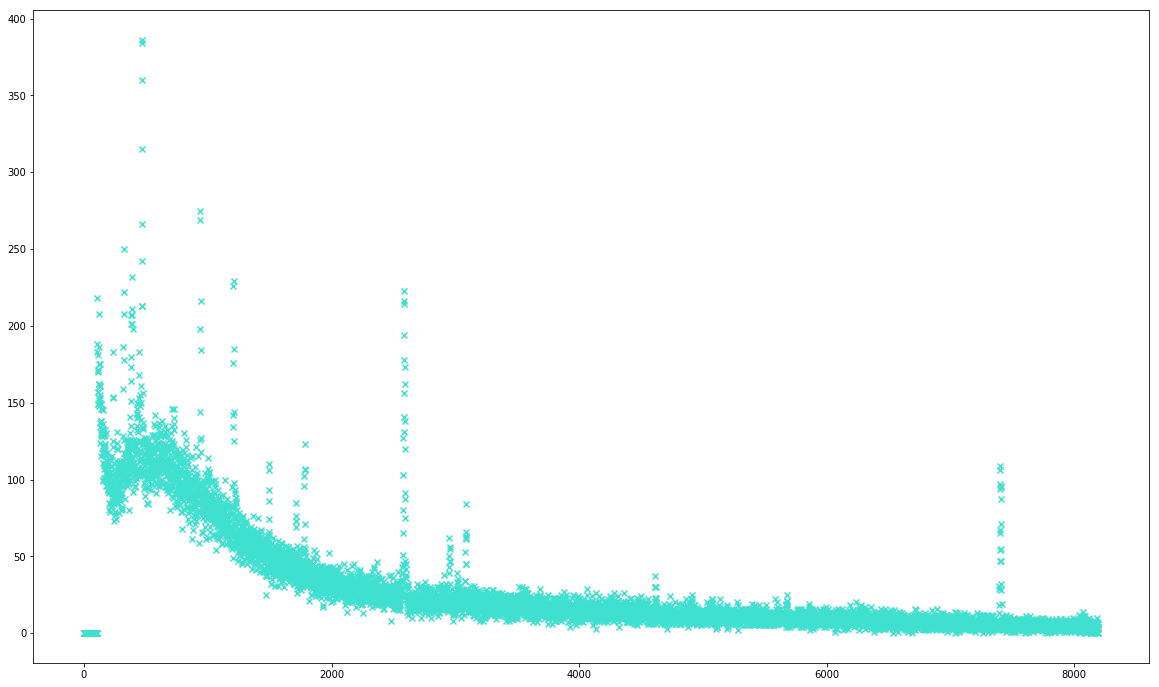

In [32]:
fig4, ax4 = plt.subplots(1, 1, figsize=(20,12))
out4 = ax4.scatter(xamo2A, sum_amo1, marker='x', color='turquoise')

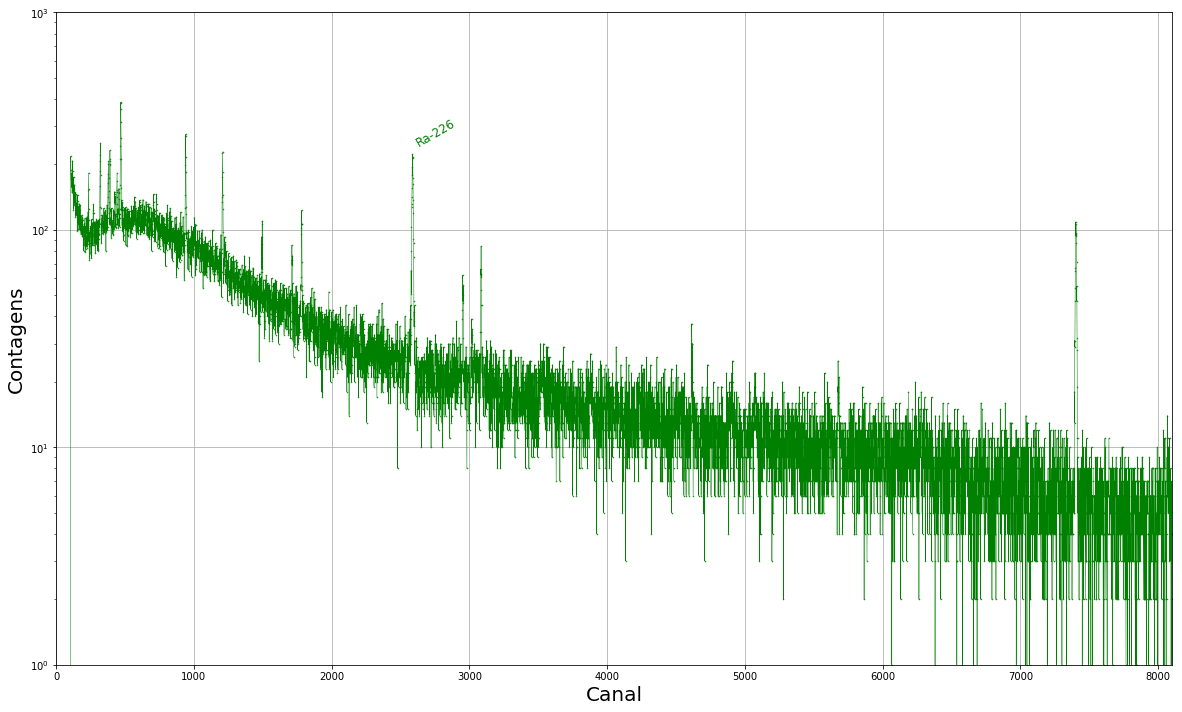

In [33]:
fig5, ax5 = plt.subplots(1, 1, figsize=(20,12))
ax5.semilogy(xamo2A, sum_amo1, marker='.', markersize=1.0, color='green', linewidth=0.5)
ax5.grid(True)
ax5.set_ylim(1, 1000)
ax5.set_xlabel('Canal', size=20)
ax5.set_ylabel('Contagens', size=20)
ax5.set_xlim(0, 8100)
ax5.text(2600, 300, 'Ra-226', color='green', rotation=30, size=12)
fig5.savefig('fig5.svg')
fig5.savefig('fig5.png')

In [34]:
# https://stackoverflow.com/questions/14050824/add-sum-of-values-of-two-lists-into-new-list

In [35]:
# https://matplotlib.org/gallery/text_labels_and_annotations/text_rotation.html#sphx-glr-gallery-text-labels-and-annotations-text-rotation-py

In [36]:
# https://matplotlib.org/gallery/scales/log_demo.html#sphx-glr-gallery-scales-log-demo-py

In [37]:
# https://matplotlib.org/gallery/api/agg_oo_sgskip.html#sphx-glr-gallery-api-agg-oo-sgskip-py    --oo orientado a objetos!!!

In [38]:
# https://docs.scipy.org/doc/scipy/reference/signal.html -- mexi em 2017, retomando agora em 2018. Ver tópico 'Peak finding'

In [39]:
peaks, _ = find_peaks(cts_amo2_A, height=0)
# plt.plot(x)
# plt.plot(peaks, x[peaks], "x")
# plt.plot(np.zeros_like(x), "--", color="gray")
# plt.show()

In [40]:
len(peaks)

2527

In [41]:
# ESTA A SEGUIR É A BUSCA PRINCIPAL QUE ESTOU ANALISANDO - 2018-Jun-07

In [42]:
peaks2, properties = find_peaks (cts_amo2_A, height=7.0, threshold = 0.0, prominence=40.0, width=3.0)

In [43]:
len(peaks2)

24

In [44]:
peaks2

array([ 108,  235,  270,  321,  380,  391,  427,  442,  457,  470,  555,
        709,  829,  940, 1003, 1029, 1209, 1494, 1713, 1782, 2586, 2952,
       3087, 7404], dtype=int64)

In [45]:
properties

{'left_bases': array([ 106,  214,  252,  106,  341,  106,  403,  436,  452,  106,  544,
         674,  818,  857,  952, 1010, 1122, 1431, 1681, 1681, 2360, 2793,
        2793, 7304], dtype=int64),
 'left_ips': array([ 106.80059524,  234.13888889,  269.08928571,  318.775     ,
         376.        ,  389.23584906,  422.75      ,  438.66666667,
         453.47727273,  465.66666667,  551.92105263,  707.29166667,
         823.33333333,  938.07142857, 1000.06666667, 1026.23913043,
        1206.24074074, 1489.5       , 1710.11538462, 1778.5952381 ,
        2581.11111111, 2950.27272727, 3081.45833333, 7397.13157895]),
 'left_thresholds': array([31., 54., 28., 18., 11., 52., 21.,  8.,  6., 18., 12., 19., 14.,
        14., 27., 15., 46., 12.,  7., 12., 32., 17.,  6.,  6.]),
 'peak_heights': array([199., 176., 128., 240., 204., 274., 160., 151., 150., 386., 142.,
        137., 117., 251., 119., 109., 252.,  86.,  74., 101., 217.,  60.,
         61.,  97.]),
 'prominences': array([129.,  93.,  51

Text(2600,300,'Ra-226')

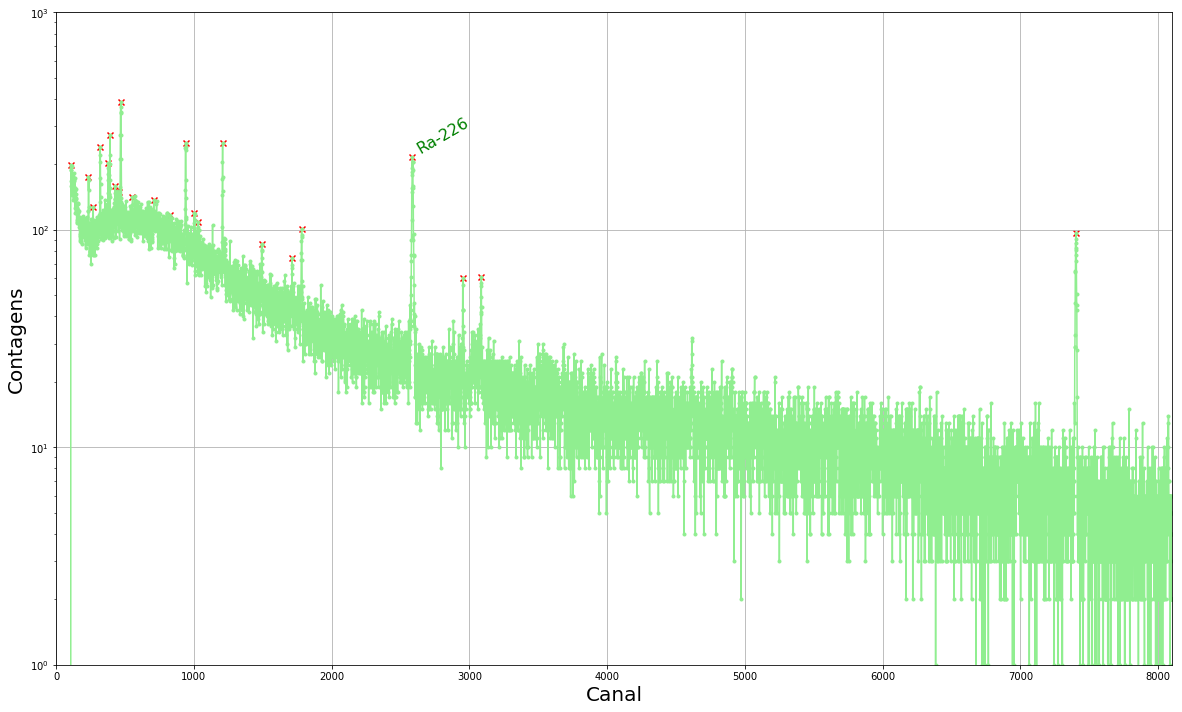

In [46]:
fig5, ax5 = plt.subplots(1, 1, figsize=(20,12))
ax5.semilogy(xamo2A, cts_amo2_A, marker='.', color='lightgreen')
ax5.scatter(peaks2, [cts_amo2_A[i] for i in peaks2], marker='x', color='red')
ax5.grid(True)
ax5.set_xlim(0, 8100)
ax5.set_ylim(1, 1000)
ax5.set_xlabel('Canal', size=20)
ax5.set_ylabel('Contagens', size=20)
ax5.text(2600, 300, 'Ra-226', color='green', rotation=30, size=16)
# fig5.savefig('fig5.svg')
# fig5.savefig('fig5.png')

Text(0,0.5,'Contagens')

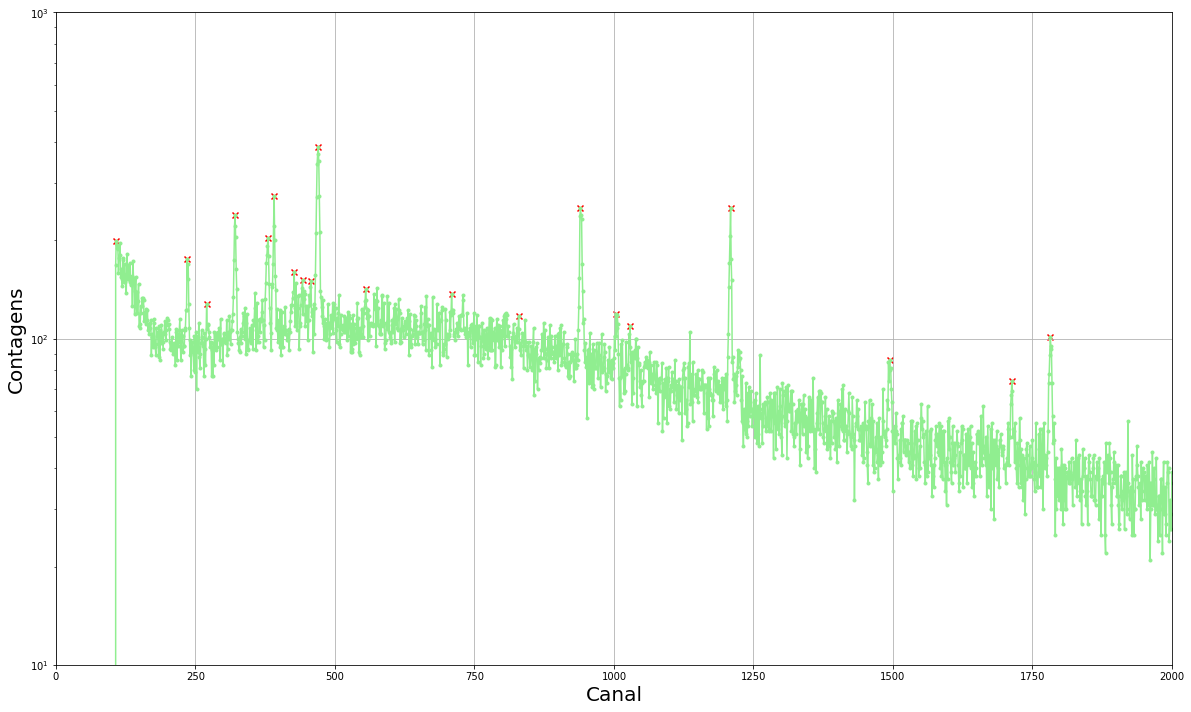

In [47]:
fig5, ax5 = plt.subplots(1, 1, figsize=(20,12))
ax5.semilogy(xamo2A, cts_amo2_A, marker='.', color='lightgreen')
ax5.scatter(peaks2, [cts_amo2_A[i] for i in peaks2], marker='x', color='red')
ax5.grid(True)
ax5.set_xlim(0, 2000)
ax5.set_ylim(10, 1000)
ax5.set_xlabel('Canal', size=20)
ax5.set_ylabel('Contagens', size=20)
# ax5.text(2600, 300, 'Ra-226', color='green', rotation=30, size=16)
# fig5.savefig('fig5.svg')
# fig5.savefig('fig5.png')

Text(0,0.5,'Contagens')

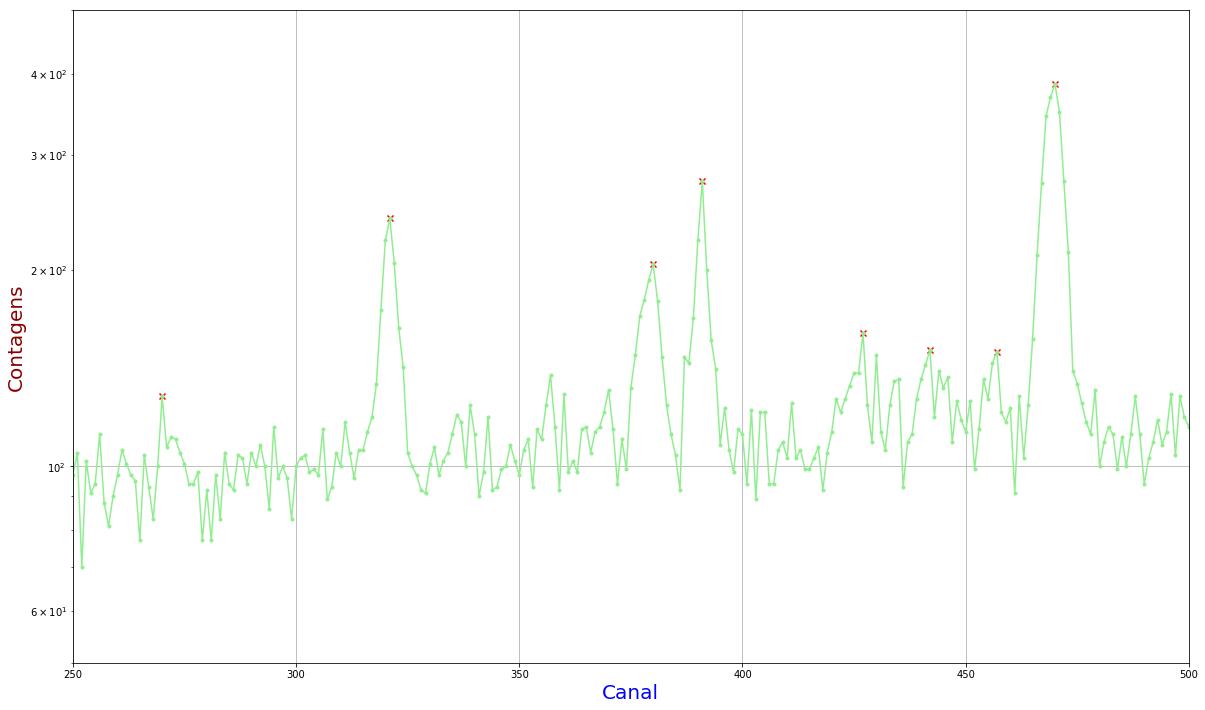

In [48]:
fig5, ax5 = plt.subplots(1, 1, figsize=(20,12))
ax5.semilogy(xamo2A, cts_amo2_A, marker='.', color='lightgreen')
ax5.scatter(peaks2, [cts_amo2_A[i] for i in peaks2], marker='x', color='red')
ax5.grid(True)
ax5.set_xlim(250, 500)
ax5.set_ylim(50, 500)
ax5.set_xlabel('Canal', size=20, color='blue')
ax5.set_ylabel('Contagens', size=20, color='darkred')
# ax5.text(2600, 300, 'Ra-226', color='green', rotation=30, size=16)
# fig5.savefig('fig5.svg')
# fig5.savefig('fig5.png')

In [49]:
peaks2

array([ 108,  235,  270,  321,  380,  391,  427,  442,  457,  470,  555,
        709,  829,  940, 1003, 1029, 1209, 1494, 1713, 1782, 2586, 2952,
       3087, 7404], dtype=int64)

In [50]:
xamo2A[peaks2]

array([ 108.,  235.,  270.,  321.,  380.,  391.,  427.,  442.,  457.,
        470.,  555.,  709.,  829.,  940., 1003., 1029., 1209., 1494.,
       1713., 1782., 2586., 2952., 3087., 7404.])

In [51]:
peaks2.dtype

dtype('int64')

In [52]:
heights = [cts_amo2_A[i] for i in peaks2]
heights

[199,
 176,
 128,
 240,
 204,
 274,
 160,
 151,
 150,
 386,
 142,
 137,
 117,
 251,
 119,
 109,
 252,
 86,
 74,
 101,
 217,
 60,
 61,
 97]

In [53]:
heightsa = np.asarray(heights)
heightsa

array([199, 176, 128, 240, 204, 274, 160, 151, 150, 386, 142, 137, 117,
       251, 119, 109, 252,  86,  74, 101, 217,  60,  61,  97])

In [54]:
sigma_heights = [np.sqrt(x) for x in heights]
sigma_heights

[14.106735979665885,
 13.2664991614216,
 11.313708498984761,
 15.491933384829668,
 14.2828568570857,
 16.55294535724685,
 12.649110640673518,
 12.288205727444508,
 12.24744871391589,
 19.6468827043885,
 11.916375287812984,
 11.704699910719626,
 10.816653826391969,
 15.84297951775486,
 10.908712114635714,
 10.44030650891055,
 15.874507866387544,
 9.273618495495704,
 8.602325267042627,
 10.04987562112089,
 14.730919862656235,
 7.745966692414834,
 7.810249675906654,
 9.848857801796104]

In [55]:
np.log(2.7182810)

0.999999695226903

In [56]:
cts_logs = [ np.log(ct) for ct in cts_amo2_A ]

C:\Users\mmaduar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [57]:
def sigma_ct (ct):
    if ct > 1:
        sigm = np.sqrt(ct)
    else:
        sigm = 1
    return sigm
sigma_cts = [ sigma_ct(ct) for ct in cts_amo2_A ]

In [58]:
pairs = [(1, 'one'), (2, 'two'), (3, 'three'), (4, 'four')]
pairs.sort(key=lambda pair: pair[1])
pairs

[(4, 'four'), (1, 'one'), (3, 'three'), (2, 'two')]

Text(0,0.5,'ln (Contagens)')

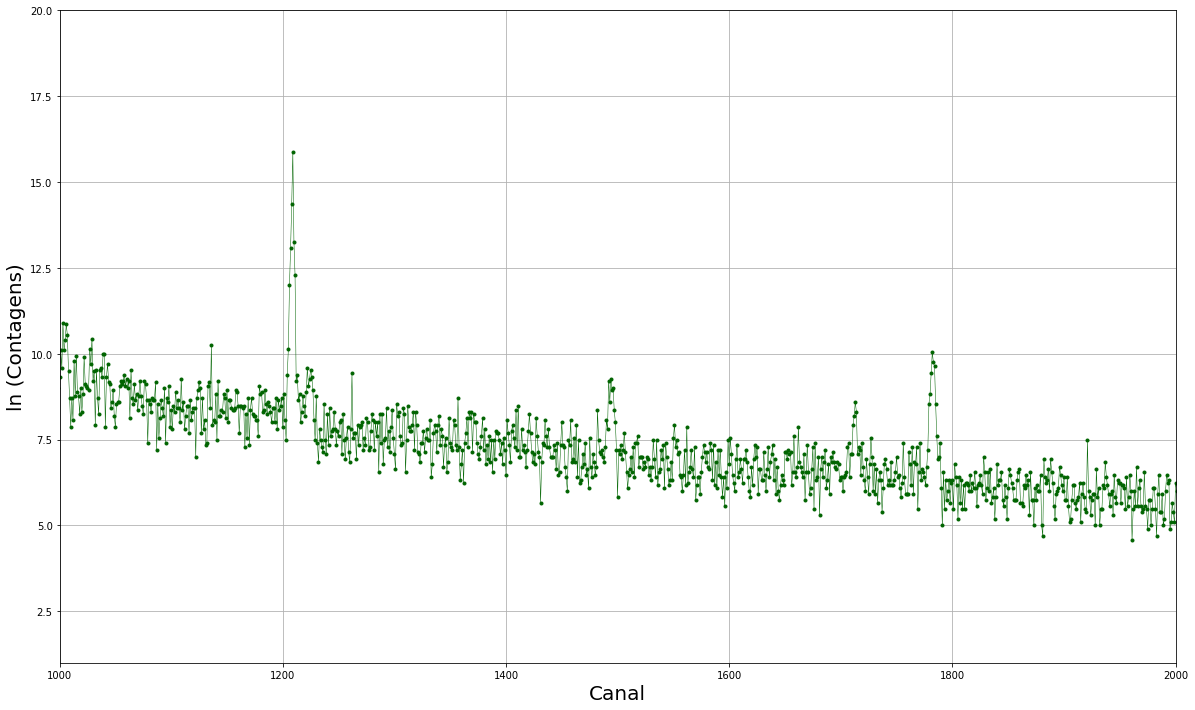

In [59]:
fig5, ax5 = plt.subplots(1, 1, figsize=(20,12))
ax5.plot(xamo2A, sigma_cts, marker='.', color='darkgreen', linewidth=0.5)
ax5.grid(True)
ax5.set_xlim(1000, 2000)
ax5.set_ylim(1, 20)
ax5.set_xlabel('Canal', size=20)
ax5.set_ylabel('ln (Contagens)', size=20)
# ax5.text(2600, 300, 'Ra-226', color='green', rotation=30, size=16)
# fig5.savefig('fig5.svg')
# fig5.savefig('fig5.png')

In [60]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.peak_widths.html
peaks, _ = find_peaks(cts_amo2_A)
results_half = peak_widths(cts_amo2_A, peaks, rel_height=0.5)
results_half[0]  # widths

results_full = peak_widths(cts_amo2_A, peaks, rel_height=1)
results_full[0]  # widths

array([145.58333333,   1.83333333,   3.88095238, ...,  55.        ,
         3.75      ,   2.66666667])

In [61]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.peak_widths.html
peaks, _ = find_peaks (cts_amo2_A, height=7.0, threshold = 0.0, prominence=40.0, width=3.0)
results_half = peak_widths(cts_amo2_A, peaks, rel_height=0.5)
results_half[0]  # widths

results_full = peak_widths(cts_amo2_A, peaks, rel_height=1)
results_full[0]  # widths

array([ 145.58333333,   27.72727273,   14.        ,   33.75      ,
         27.        ,   96.        ,   57.9375    ,   24.9375    ,
          8.75      , 6571.        ,   29.68421053,  113.        ,
         38.80487805,   94.67741935,  126.9       ,   31.        ,
        109.75      ,  164.9       ,   55.9375    ,  109.75      ,
        251.77777778,   48.        ,  582.        ,  195.        ])

In [62]:
results_half

(array([29.91607143,  3.82452575,  5.53571429,  4.17738095,  5.96875   ,
         3.18460549,  5.20833333,  4.23958333,  4.40203762,  7.60730594,
         4.9122807 ,  5.33333333,  7.4       ,  5.27339901,  8.07619048,
         3.74003623,  4.76683502,  8.91666667,  4.80566802,  6.97142857,
        12.22222222,  5.87012987,  7.89351852, 10.28508772]),
 array([134.5, 129.5, 102.5, 165. , 148. , 181.5, 125.5, 122. , 124.5,
        193. , 118.5, 109.5,  96. , 159. ,  88. ,  85.5, 150.5,  59. ,
         51.5,  64.5, 116. ,  35. ,  34.5,  48.5]),
 array([ 106.80059524,  234.13888889,  269.08928571,  318.775     ,
         376.        ,  389.23584906,  422.75      ,  438.66666667,
         453.47727273,  465.66666667,  551.92105263,  707.29166667,
         823.33333333,  938.07142857, 1000.06666667, 1026.23913043,
        1206.24074074, 1489.5       , 1710.11538462, 1778.5952381 ,
        2581.11111111, 2950.27272727, 3081.45833333, 7397.13157895]),
 array([ 136.71666667,  237.96341463,  274

In [63]:
results_full

(array([ 145.58333333,   27.72727273,   14.        ,   33.75      ,
          27.        ,   96.        ,   57.9375    ,   24.9375    ,
           8.75      , 6571.        ,   29.68421053,  113.        ,
          38.80487805,   94.67741935,  126.9       ,   31.        ,
         109.75      ,  164.9       ,   55.9375    ,  109.75      ,
         251.77777778,   48.        ,  582.        ,  195.        ]),
 array([70., 83., 77., 90., 92., 89., 91., 93., 99.,  0., 95., 82., 75.,
        67., 57., 62., 49., 32., 29., 28., 15., 10.,  8.,  0.]),
 array([ 106.41666667,  214.        ,  265.        ,  307.25      ,
         359.        ,  307.        ,  403.0625    ,  436.        ,
         452.        ,  106.        ,  544.31578947,  674.        ,
         818.        ,  857.        ,  952.        , 1010.        ,
        1122.        , 1431.        , 1681.0625    , 1681.        ,
        2360.        , 2920.        , 2793.        , 7304.        ]),
 array([ 252.        ,  241.72727273,  279

In [64]:

pyplt.plot(cts_amo2_A)
peaks_scal = [cts_amo2_A[i] for i in peaks]
pyplt.plot(peaks, peaks_scal, "x")
pyplt.hlines(*results_half[1:], color="C2")
pyplt.hlines(*results_full[1:], color="C3")
pyplt.show()

NameError: name 'pyplt' is not defined

In [65]:
pyplt.plot(cts_amo2_A, marker='.', color='lightgreen', linewidth=0.5)
peaks_scal = [cts_amo2_A[i] for i in peaks]
pyplt.plot(peaks, peaks_scal, "x")
pyplt.hlines(*results_half[1:], color="C2")
pyplt.hlines(*results_full[1:], color="C3")

NameError: name 'pyplt' is not defined

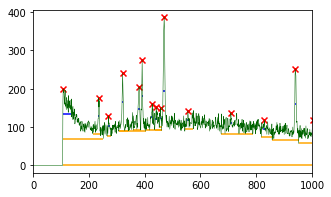

In [66]:
fig6, ax6 = plt.subplots(1, 1, figsize=(5,3))
ax6.scatter(peaks2, [cts_amo2_A[i] for i in peaks2], marker='x', color='red')
ax6.plot(xamo2A, cts_amo2_A, color='darkgreen', linewidth='0.5')
ax6.set_xlim(0, 1000)
ax6.hlines(*results_half[1:], color='blue')
ax6.hlines(*results_full[1:], color='orange')

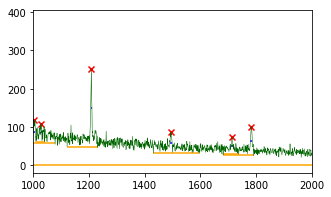

In [67]:
fig6, ax6 = plt.subplots(1, 1, figsize=(5,3))
ax6.scatter(peaks2, [cts_amo2_A[i] for i in peaks2], marker='x', color='red')
ax6.plot(xamo2A, cts_amo2_A, color='darkgreen', linewidth='0.5')
ax6.set_xlim(1000, 2000)
ax6.hlines(*results_half[1:], color='blue')
ax6.hlines(*results_full[1:], color='orange')

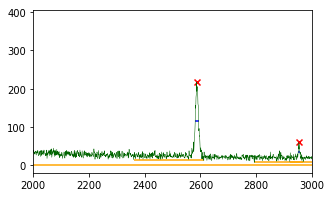

In [68]:
fig6, ax6 = plt.subplots(1, 1, figsize=(5,3))
ax6.scatter(peaks2, [cts_amo2_A[i] for i in peaks2], marker='x', color='red')
ax6.plot(xamo2A, cts_amo2_A, color='darkgreen', linewidth='0.5')
ax6.set_xlim(2000, 3000)
ax6.hlines(*results_half[1:], color='blue')
ax6.hlines(*results_full[1:], color='orange')

In [69]:
def gaus(x):
    """Gaussian function.

    Args:
        x (float): variable.

    Returns:
        float: f(x), where f(x)=exp(-x**2).

    """
    return np.exp(-x**2)

In [70]:
def gausmaisk(x, hei, shp, ctr, cte):
    return hei * np.exp( -shp * (x-ctr)^2.0 ) + cte